![Logo de AA1](logo_AA1_texto_small.png) 
# Sesión 24 - Otros algoritmos de regresión

En las sesiones anteriores hemos explicado las ideas fundamentales de varios algoritmos de aprendizaje automático. 
Muchos de esos algoritmos pueden utilizarse también en tareas de regresión.

En esta sesión vamos a ir comentando las particularidades de cada uno de esos algoritmos para poder resolver tareas de regresión.

Vamos a cargar un conjunto de datos para poder ejecutar algún algoritmo:


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
from IPython.display import Image
from sklearn import metrics
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from xgboost import XGBRegressor

print('\n##########################################')
print('### cargar el conjunto y separar X e y')
print('##########################################')

# se llama a la función read_csv
# no tiene missing y las columnas están separadas por uno o varios espacios en blanco '\s+'. No tiene cabecera
cabecera = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.data', sep='\s+', names=cabecera)
filas, columnas = df.shape


# la clase está en la última columna 
# separamos los atributos y los almacenamos en X
X = df.drop(['MEDV'], axis=1)
display(X)

# separamos la clase y la almacenamos en Y
y = df['MEDV']
display(y)

print('\n##########################################')
print('### Hold-out 80-20')
print('##########################################')

# en los problemas de regresión no tiene sentido estratificar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


##########################################
### cargar el conjunto y separar X e y
##########################################


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


##########################################
### Hold-out 80-20
##########################################



## 24.1 K-vecinos

La esencia de este algoritmo es localizar los `n_neighbors` vecinos más cercanos y realizar una predicción condicionada por los valores que tienen esos vecinos:
- si `weights=uniform` la predicción será la media de la clase de los vecinos más próximos
- si `weights=distance` la predicción será la media ponderada por la distancia a la que está cada vecino

En `Scikit-learn` contamos con `KNeighborsRegressor` para aplicar este algoritmos en problemas de regresión. En https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=regressor#sklearn.neighbors.KNeighborsRegressor podéis ver más detalles.

Veamos un ejemplo de uso:

In [2]:
# se crea el k-vecinos
sys = KNeighborsRegressor()

# se entrena y se evalúa
sys.fit(X_train, y_train)
y_pred = sys.predict(X_test)

# se calculan las métricas
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("MAE = %.3f\nMSE = %.3f\nR2 = %.3f" % (mae, mse, r2))

MAE = 4.713
MSE = 45.424
R2 = 0.557


## 24.2 Árboles de decisión 

Ya vimos que una de las cualidades de los árboles de decisión es su capacidad explicativa y por eso siguen siendo tan utilizados.

Los árboles de decisión en tareas de regresión, para decidir cual es el mejor punto de corte para utilizar un atributo como nodo en el árbol, **escogen aquel que minimiza el error cuadrático medio**.

Para trabajar con problemas de regresión contamos con `DecisionTreeRegressor` que comparte muchas de las características que ya vimos en el clasificador:
- `max_depth`, profundidad máxima del árbol.
- `min_samples_split`, mínimo número de ejemplos que debe tener un nodo para ser dividido.
- `min_samples_leaf`, mínimo número de ejemplos requeridos en una hoja.
- `max_leaf_nodes`, máximo número de hojas.
- `min_impurity_decrease`, mímino decrecimiento requerido de la impureza para aceptar una división.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontree#sklearn.tree.DecisionTreeRegressor

Vamos a ejecutarlo:

In [3]:
# se crea el árbol de decisión
sys = DecisionTreeRegressor(random_state=1234)

# se entrena y se evalúa
sys.fit(X_train, y_train)
y_pred = sys.predict(X_test)

# se calculan las métricas
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("MAE = %.3f\nMSE = %.3f\nR2 = %.3f" % (mae, mse, r2))

MAE = 2.612
MSE = 12.366
R2 = 0.880


Y ahora vamos a visualizar el árbol generado:

In [4]:
# se obtiene la representación en formato 'dot' del árbol de decisión
dot_data = export_graphviz(decision_tree=sys, feature_names=X.columns, filled=True)
#print("Si no tienes GraphViz instalado, para visualizar el árbol copia y pega lo siguiente en: https://dreampuf.github.io/GraphvizOnline/")
#print(dot_data)

# se transforma la representación de árbol en formato 'dot' a formato gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# lo visualizamos
Image(graph.create_png())

InvocationException: GraphViz's executables not found

El árbol generado es inmenso. Puedes probar a limitarlo de alguna manera.

## 24.3 Máquinas de vectores soporte

Las Máquinas de Vectores Soporte (SVM) para regresión siguen una filosofía similar a las de clasificación.

Los problemas de regresión son un poco más complicados puesto que acertar exactamente un valor continuo es casi imposible. Por esta razón se incorpora un nuevo hiperparámetro la ecuación, $\epsilon$ (`epsilon`), que servirá para indicar la tolerancia que tendremos respecto a los fallos. Si el valor predicho para un ejemplo $x_i$ es $\hat{y}_i$:
- se considerará que el error cometido es 0 si $(y_i-\epsilon) \le \hat{y}_i \le (y_i+\epsilon)$
- en cualquier otro caso, el error será la diferencia con el borde más cercano

De esta forma se calculan los errores que comete el sistema, que tendrán mayor o menor importancia durante el aprendizaje en función del hiperparámtero `C`, que ya habíamos visto que actúa como equilibrio entre el sumatorio de los errores y la norma de $w$, los parámetros que se aprenden.

En `sklearn` disponemos de `SVR` como implementación de las SVM de regresión. Esta implementación cuenta también con la posibilidad de utilizar diferentes kernels, siendo los más utilizados `'linear'`, `'poly'` (al que debemos indicarle el `degree`) y `'rbf'` (que se verá afectado por la `gamma` indicada).

Podéis encontrar más información en: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

Veamos un ejemplo de uso:

In [5]:
# se crea una SVM
sys = SVR(kernel='rbf', epsilon=0.01, C=100000)

# se entrena y se evalúa
sys.fit(X_train, y_train)
y_pred = sys.predict(X_test)

# se calculan las métricas
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("MAE = %.3f\nMSE = %.3f\nR2 = %.3f" % (mae, mse, r2))

MAE = 2.650
MSE = 16.298
R2 = 0.841


Puedes probar diferentes kernels e hiperparámetros para ver cómo afecta al rendimiento del modelo.

## 24.4 Bagging

Ya habíamos comentado en su momento que la idea detrás del bagging es muy sencilla: se entrenarán muchos modelos utilizando particiones del conjunto de datos ligeramente diferentes y se combinarán las salidas de todos ellos para obtener la predicción final. Al tener muchos modelos, unos se sobreajustarán en unas zonas del espacio y otros modelos lo harán en otras zonas, pero esos sobreajustes perderán fuerza en la combinación final de todos los modelos.

### 24.4.1 `BaggingRegressor`
Utilizando el algoritmo `BaggingRegressor` seremos capaces de efectuar un bagging. En `base_estimator` debemos indicarle qué sistema utilizaremos como estimador y en `n_estimators` lediremos el número de estimadores deseado. En https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html podemos consultar otros parámetros de este algoritmo.


### 24.4.2 Random Forest

El algoritmo de bagging más popular es el Random Forest, cuya implementación es `RandomForestRegressor`. Este algoritmo utilizará como estimadores árboles de regresión y promediará la predicción de todos los estimadores utilizados para generar la predicción final.

En https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html se pueden encontrar más detalles de su uso que en gran medida son los mismos detalles presentes en `RandomForestClassifier`.

También podemos obtener la relevancia de los atributos consultando el atributo `feature_importances_` después de haber entrenado.

Vamos a probarlo:

MAE = 2.035
MSE = 8.987
R2 = 0.912

##########################################
### Relevancia con RandomForest
##########################################


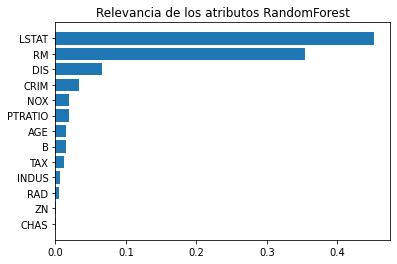

In [6]:
# se crea un Random Forest
sys = RandomForestRegressor(random_state=1234)

# se entrena y se evalúa
sys.fit(X_train, y_train)
y_pred = sys.predict(X_test)

# se calculan las métricas
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("MAE = %.3f\nMSE = %.3f\nR2 = %.3f" % (mae, mse, r2))

print('\n##########################################')
print('### Relevancia con RandomForest')
print('##########################################')

# obtenemos el número de atributos
(num_ejemplos, num_atributos) = X.shape 

importances = sys.feature_importances_
# ordenamos los atributos en orden descendente de importancia
indices = np.argsort(importances)[::-1]
# los representamos gráficamente
plt.figure()
plt.title("Relevancia de los atributos RandomForest") 
# [::-1] para que aparezcan en orden decreciente en la gráfica
plt.barh(range(num_atributos), importances[indices[::-1]], tick_label=X.columns[indices[::-1]]) 
plt.show()


## 24.5 Boosting
En el boosting se utilizan modelos muy simples que se combinan para dar lugar a un modelo fuerte. Como modelos débiles, es muy común utilizar árboles de decisión con `max_depth=1`.

En boosting se utilizan todos los ejemplos disponibles para entrenar (no como en bagging donde se hacían muestreos con reemplazamiento). La particularidad que tiene el boosting es que tras entrenar el primer modelo se utilizará el mismo para realizar una predicción para los ejemplos del conjunto de entrenamiento. Como es un modelo débil (muy limitado) en algunos ejemplos cometerá poco error (o ninguno) y en otros cometerá más error, así que se asignarán pesos a los ejemplos en función del error. Se entrenará un nuevo modelo que se utilizará para volver a realizar predicciones y que dará lugar a una nueva asignación de pesos. Este proceso se repetirá las veces que queramos.

### 24.5.1 Ada Boost
Para trabajar con problema de regresión podemos utilizar el `AdaBoostRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

Sus hiperparámetros más importantes son los mismos que ya vimos en su versión como clasificador:
- `base_estimator`, el algoritmo base que utilizaremos (que por defecto es un árbol de decisión con profundidad 1)
- `n_estimators`, número de modelos que se entrenarán
- `learning_rate`, valor en el rango (0, inf) que sirve para con cuánta intensidad intentará de corregir cada árbol los errores de los árboles anteriores. Valores pequeños harán que los pesos sean menos agresivos.

También podemos obtener la relevancia de los atributos consultando el atributo `feature_importances_` después de haber entrenado.

Vamos a probarlo:

MAE = 2.766
MSE = 13.675
R2 = 0.867

##########################################
### Relevancia con AdaBoost
##########################################


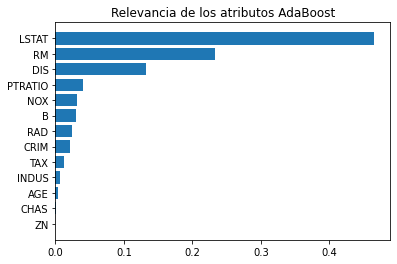

In [7]:
# se crea un AdaBoostRegressor
sys = AdaBoostRegressor(random_state=1234)

# se entrena y se evalúa
sys.fit(X_train, y_train)
y_pred = sys.predict(X_test)

# se calculan las métricas
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("MAE = %.3f\nMSE = %.3f\nR2 = %.3f" % (mae, mse, r2))

print('\n##########################################')
print('### Relevancia con AdaBoost')
print('##########################################')

importances = sys.feature_importances_
# ordenamos los atributos en orden descendente de importancia
indices = np.argsort(importances)[::-1]
# los representamos gráficamente
plt.figure()
plt.title("Relevancia de los atributos AdaBoost") 
# [::-1] para que aparezcan en orden decreciente en la gráfica
plt.barh(range(num_atributos), importances[indices[::-1]], tick_label=X.columns[indices[::-1]]) 
plt.show()


### 24.5.2 XGBoost

El popular algoritmo de boosting XGBoost también puede ser utilizado en tareas de regresión utilizando la implementación `XGBRegressor` de su API para `sklearn` contenida en la librería `xgboost`.

Podéis consultar sus hiperparámetros en https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

Veamos cuál es su rendimiento en este conjunto de datos:

In [8]:
# se crea un XGBRegressor
sys = XGBRegressor()

# se entrena y se evalúa
sys.fit(X_train, y_train)
y_pred = sys.predict(X_test)

# se calculan las métricas
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("MAE = %.3f\nMSE = %.3f\nR2 = %.3f" % (mae, mse, r2))

MAE = 1.994
MSE = 9.117
R2 = 0.911


Este algoritmo de boosting suele obtener buenos resultados.

## Ejercicios

1. Carga los datos del fichero **airfoil_self_noise.data**. 
2. Separa el conjunto de datos para hacer un hold out 80-20.
3. Evalúa el rendimiento de varios algoritmos de los comentados en esta sesión.
4. Muestra, en forma de tabla, los resultados de las métricas explicadas en el notebook.

Estos ejercicios no es necesario entregarlos.